# Load Libraries

In [1]:
import sys
import math
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import re
import glob as g
import gc
from scipy import stats 
from matplotlib.ticker import AutoMinorLocator

In [2]:
from scipy.optimize import curve_fit

In [3]:
sys.path.append("/home/jackh/cphmd_tools/cphmd-analysis")
import cphmdanalysis as cphmd
from cphmdanalysis import compute_pkas as pka

# Functions

In [4]:
def mindist(sel1, sel2):
    list_o_dist = []
    for a in sel1:
        for b in sel2:
            p1 = a.position
            p2 = b.position
            dist = math.sqrt((p2[2]-p1[2])**2+(p2[1]-p1[1])**2+(p2[0]-p1[0])**2)
            list_o_dist.append(dist)
    return min(list_o_dist)

# Paths, pHs, and Stages

In [5]:
path = '/data/jackh/plasmepsin/holo_plasmepsin/run'
phs = [4.5, 5.0, 5.5]
sstage = 21
lstage = 42
stages = [x for x in range(sstage, lstage+1)]

# Load Lambdas

Seed Files

In [6]:
files = []
for n, ph in enumerate(phs):
    files.append(g.glob('{}/{}{}/*ph{}*lamb*'.format(path, 'stage', sstage, ph)))

In [7]:
l_data = [cphmd.lambda_data(x[0]) for x in files]

Add Files

In [8]:
for rep, ph in enumerate(phs):
    for n in stages[1:]:
        file = g.glob('{}/{}{}/*ph{}*lamb*'.format(path, 'stage', n, ph))
        l_data[rep].add_l_file(file_path=file[0])
        print("{} Added".format(file[0]))

/data/jackh/plasmepsin/holo_plasmepsin/run/stage22/1sme_ph4.5_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage23/1sme_ph4.5_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage24/1sme_ph4.5_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage25/1sme_ph4.5_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage26/1sme_ph4.5_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage27/1sme_ph4.5_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage28/1sme_ph4.5_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage29/1sme_ph4.5_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage30/1sme_ph4.5_temp300.0.lamb_12 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage31/1sme_ph4.5_temp300.0.lamb_12 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage32/1sme_ph4.5_temp300.0.lamb_12 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage33/1sm

Check Data

In [9]:
print('Number of pHs: {}'.format(len(l_data)))
print('Number of titra site: {}'.format(l_data[0].n_ititr))
print('Number of lambda vals: {}'.format(len(l_data[0].lambda_and_x_vals[0])))

Number of pHs: 3
Number of titra site: 96
Number of lambda vals: 24750


In [10]:
import pandas as pd
pd.set_option('display.max_rows', None) # prevents truncation of the dataframe
l_data[0].info_table

Ititr  Ires  Itauto
0       1     4       3
1       2     4       4
2       3     7       3
3       4     7       4
4       5    10       3
5       6    10       4
6       7    19       3
7       8    19       4
8       9    21       3
9      10    21       4
10     11    24       3
11     12    24       4
12     13    34       3
13     14    34       4
14     15    56       1
15     16    56       2
16     17    59       3
17     18    59       4
18     19    67       3
19     20    67       4
20     21    69       3
21     22    69       4
22     23    74       3
23     24    74       4
24     25    89       3
25     26    89       4
26     27   104       3
27     28   104       4
28     29   107       3
29     30   107       4
30     31   112       3
31     32   112       4
32     33   121       3
33     34   121       4
34     35   130       3
35     36   130       4
36     37   137       3
37     38   137       4
38     39   142       3
39     40   142       4
40     41   150       3
41     42   150       4
42     43   161       1
43     44   161       2
44     45   162       3
45     46   162       4
46     47   164       1
47     48   164       2
48     49   174       3
49     50   174       4
50     51   175       3
51     52   175       4
52     53   179       3
53     54   179       4
54     55   185       3
55     56   185       4
56     57   189       1
57     58   189       2
58     59   190       3
59     60   190       4
60     61   198       3
61     62   198       4
62     63   200       1
63     64   200       2
64     65   207       3
65     66   207       4
66     67   214       3
67     68   214       4
68     69   225       3
69     70   225       4
70     71   235       3
71     72   235       4
72     73   258       3
73     74   258       4
74     75   262       3
75     76   262       4
76     77   269       3
77     78   269       4
78     79   271       3
79     80   271       4
80     81   276       1
81     82   276       2
82     83   278       3
83     84   278       4
84     85   279       3
85     86   279       4
86     87   293       3
87     88   293       4
88     89   303       3
89     90   303       4
90     91   314       3
91     92   314       4
92     93   316       3
93     94   316       4
94     95   318       1
95     96   318       2

# Load Asojo Data

The second column of data is the Asojo Data.

In [11]:
flap_path = 'data/raw_Asojo_holo_data'
flap_data = []
for n, ph in enumerate(phs):
    data_sub = []
    for stage in stages:
        with open('{}/pH_{}_stage_{}.dat'.format(flap_path, ph, stage), 'r') as f:
            for line in f:
                if "#" not in line:
                    split_line = re.split('\s+', line)
                    split_line = split_line[:-1]
                    data_sub.append([float(split_line[0]), float(split_line[1])])
    flap_data.append(data_sub)

In [12]:
data_remake = []
for n, ph in enumerate(phs):
    for l, dis in zip(l_data[n].lambda_and_x_vals[66], flap_data[n]):
        if l >= 0.8 or l <= 0.2:
            data_remake.append([l, dis[1]])

# Plot Data

In [13]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

In [14]:
ink_x = 1.4 # 1.5
ink_y = 1.2 # 1.5

## With Labels

In [15]:
# Taken From: https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)

    return cmp

In [16]:
#test = get_continuous_cmap(['#FFFFFF', '#FF2D97', '#FE2DFF', '#952DFF', '#2D2EFF', '#2D97FF', '#2DFFFE'])

In [17]:
blues = get_continuous_cmap(['#FFFFFF', '#2D97FF', '#2DFFFE'])

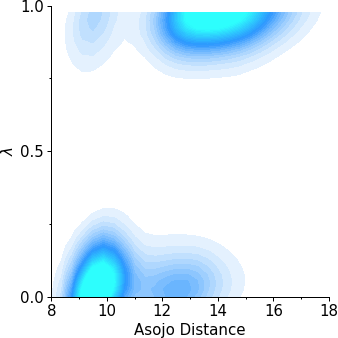

In [20]:
# Fold Cell
plt.close('all')

figrows = 1
figcols = 1
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (5, 5))
fig.set_facecolor('white')

# Get Data Points
nbins = 40
x = [x[1] for x in data_remake]
y = [y[0] for y in data_remake]

kde = stats.gaussian_kde([x, y])

xx, yy = np.mgrid[5:20:(20-5)/nbins, 
                  0:1:(1)/nbins]

density = ((kde(np.c_[xx.flat, yy.flat].T))).reshape(xx.shape)

# Plot Surface
cset = axes.contourf(xx, yy, density, 40, cmap=blues, vmax=0.6)
#plt.colorbar()
# Remove Lowest Level
cset.collections[0].remove()


# Plot Details
axes.set_xlabel('Asojo Distance', fontsize=15)
axes.set_xlim(8, 18)
axes.set_xticks([8, 10, 12, 14, 16, 18])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))

axes.set_ylabel('$\lambda$', fontsize=15)
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

fig.tight_layout()
#plt.savefig('temp.pdf')
plt.show()

## Without Labels

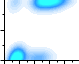

In [21]:
# Fold Cell
plt.close('all')

figrows = 1
figcols = 1
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# Get Data Points
nbins = 40
x = [x[1] for x in data_remake]
y = [y[0] for y in data_remake]

kde = stats.gaussian_kde([x, y])

xx, yy = np.mgrid[5:20:(20-5)/nbins, 
                  0:1:(1)/nbins]

density = ((kde(np.c_[xx.flat, yy.flat].T))).reshape(xx.shape)

# Plot Surface
cset = axes.contourf(xx, yy, density, 40, cmap=blues, vmax=0.6)
#plt.colorbar()
# Remove Lowest Level
cset.collections[0].remove()
# Salt-Bridge Cutoff Line
#axes.hlines(3.5, 0, 1, colors='Black', )


# Plot Details
axes.set_xlim(8, 18)
axes.set_xticks([8, 10, 12, 14, 16, 18])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)

axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)


axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

fig.tight_layout()
plt.savefig('plots/HM_D214_lambda_vs_Asojo_Distance.png', dpi=360, transparent=True)
plt.show()